## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Import, read and understand the data

In [1]:
# Suppressing Warnings
# Importing Pandas and NumPy
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
pd.set_option("display.max_rows",1000)

In [2]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [4]:
#let's get the information of the dataframe
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#take a look at the statistical informaiton
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.nunique() 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
#check for duplicates
duplicate=lead_data[lead_data.duplicated()]
duplicate

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


we can observe that there are no duplicates in the dataset

### step 2: Preprocessing the data

In [8]:
#dropping prospect_id and leadnumber as they are index 
lead_data=lead_data.drop(['Prospect ID','Lead Number'],1)

we see that there are few variables with zero variance i.e., there is only one value in it. We drop those columns

In [9]:
lead_data=lead_data.drop(['I agree to pay the amount through cheque','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],1)

### step 3: EDA on the dataset

In [10]:
#replacing Select with null
cols=lead_data.columns
for i in cols:
    lead_data.loc[lead_data[i]=='Select',i]=np.nan
    

In [11]:
#find the missing values in the data mv-missing values
mv=lead_data.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
11,How did you hear about X Education,78.463203
22,Lead Profile,74.188312
21,Lead Quality,51.590909
27,Asymmetrique Profile Score,45.649351
26,Asymmetrique Activity Score,45.649351
25,Asymmetrique Profile Index,45.649351
24,Asymmetrique Activity Index,45.649351
23,City,39.707792
10,Specialization,36.580087
20,Tags,36.287879


In [12]:
#drop columns with missing values more than 45
#after droppping store the dataset into lead_1
drop_cols=list(mv[mv["% Missing Values"]>=35]["Column Name"])
lead_1=lead_data.drop(drop_cols,axis=1)

In [13]:
#check the shape of new dataframe
lead_1.shape

(9240, 20)

In [14]:
#find the missing values in the data mv-missing values
mv=lead_1.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
11,What matters most to you in choosing a course,29.318182
10,What is your current occupation,29.112554
9,Country,26.634199
5,TotalVisits,1.482684
7,Page Views Per Visit,1.482684
8,Last Activity,1.114719
1,Lead Source,0.389610
13,Newspaper Article,0.000000
18,A free copy of Mastering The Interview,0.000000
17,Through Recommendations,0.000000


In [15]:
#categorizing the variables into continuos and categorical 
cat_cols=[]
con_cols=[]
for i in lead_1:
    if lead_1[i].nunique()<=20:
        cat_cols.append(i)
    else:
        con_cols.append(i)
print("cat_cols",cat_cols,'\n')
print("con_cols",con_cols)

cat_cols ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 

con_cols ['Lead Source', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Country']


In [16]:
#handling missing values in continous columns: replace numerical values with medain and object value with most commonly occured value
for i in con_cols:
    if lead_1[i].isnull().sum()>0:
        if lead_1[i].dtype=="object":
            lead_1[i]=lead_1[i].fillna(lead_1[i].mode()[0])
        else:
            lead_1[i]=lead_1[i].fillna(lead_1[i].median())

In [17]:
#handling missing values in categorical variable:replace values with mode
for i in cat_cols:
    if lead_1[i].isnull().sum()>0:
        if lead_1[i].dtype=="object":
            lead_1[i]=lead_1[i].fillna(lead_1[i].mode()[0])
        else:
            lead_1[i]=lead_1[i].fillna(lead_1[i].mode()[0])

In [18]:
#find the missing values in the data mv-missing values
mv=lead_1.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
0,Lead Origin,0.0
1,Lead Source,0.0
18,A free copy of Mastering The Interview,0.0
17,Through Recommendations,0.0
16,Digital Advertisement,0.0
15,Newspaper,0.0
14,X Education Forums,0.0
13,Newspaper Article,0.0
12,Search,0.0
11,What matters most to you in choosing a course,0.0


There are no missing values

### checking for outliers

In [19]:
#importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
cols=lead_1[con_cols]
cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


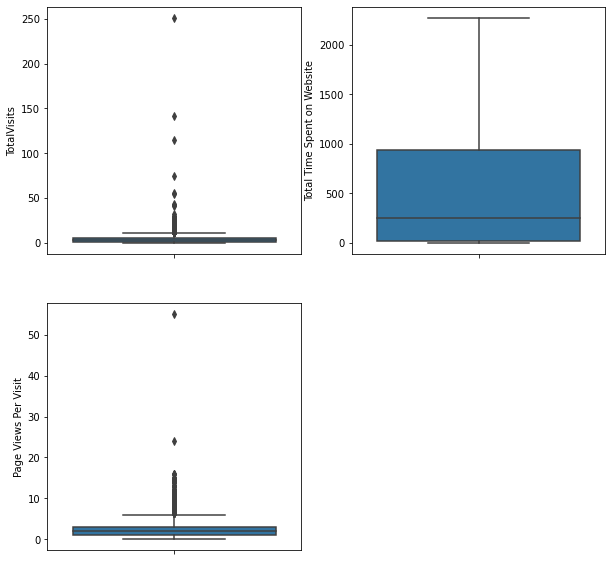

In [21]:
#we use boxplot for checking outliers
k=1
plt.figure(figsize=(10, 10))
for i in con_cols:
    if lead_1[i].dtype!='object':
        plt.subplot(2,2,k)
        sns.boxplot(y=i,data=lead_1)
        k=k+1
plt.show()
    

we found there are few outliers, we can cap the outliers

In [22]:
#capping the outliers with iqr value
for i in cols:
    if lead_1[i].dtype=="float64":
        q1=lead_1[i].describe()["25%"]
        q3=lead_1[i].describe()["75%"]
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        lead_1[i]=np.where(lead_1[i]<lower_bound,lower_bound,lead_1[i])
        lead_1[i]=np.where(lead_1[i]>upper_bound,upper_bound,lead_1[i])

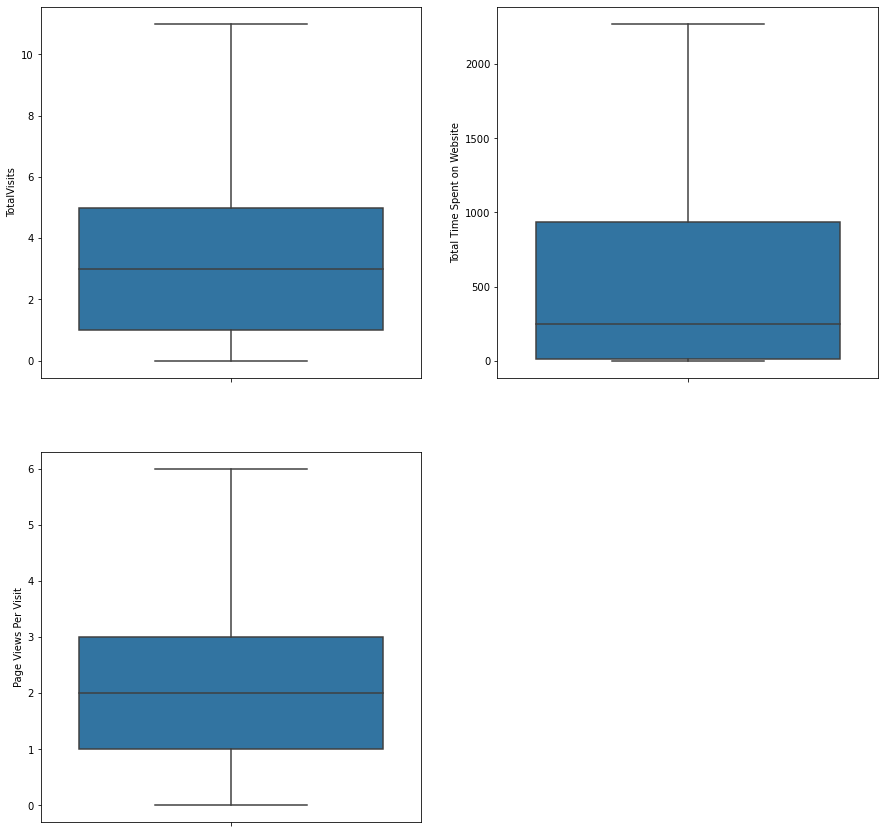

In [23]:
#check if outliers are handled
k=1
plt.figure(figsize=(15, 15))
for i in con_cols:
    if lead_1[i].dtype!='object':
        plt.subplot(2,2,k)
        sns.boxplot(y=i,data=lead_1)
        k=k+1
plt.show()
    

The outliers are correctly handled, so there are no outliers

## Univariate Analysis

#### Histplot

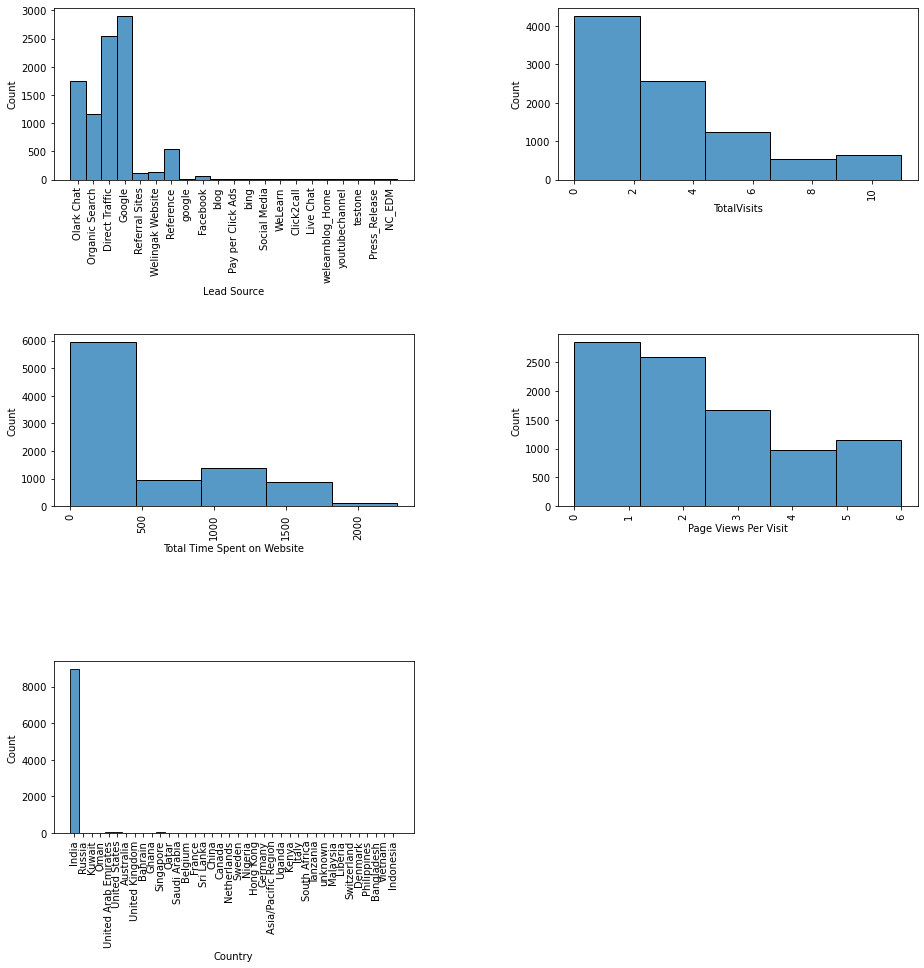

In [24]:
#using a histogram to see the numerical data ditribution
k=1
plt.figure(figsize=(15, 20))
for i in con_cols:
    plt.subplot(4,2,k)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.9)
    sns.histplot(lead_1[i],bins=5)
    plt.xticks(rotation=90)
    k=k+1
plt.show()
    

we see the lead source is mostly from google

Only India has more leads

Total visits are graddually decreasing

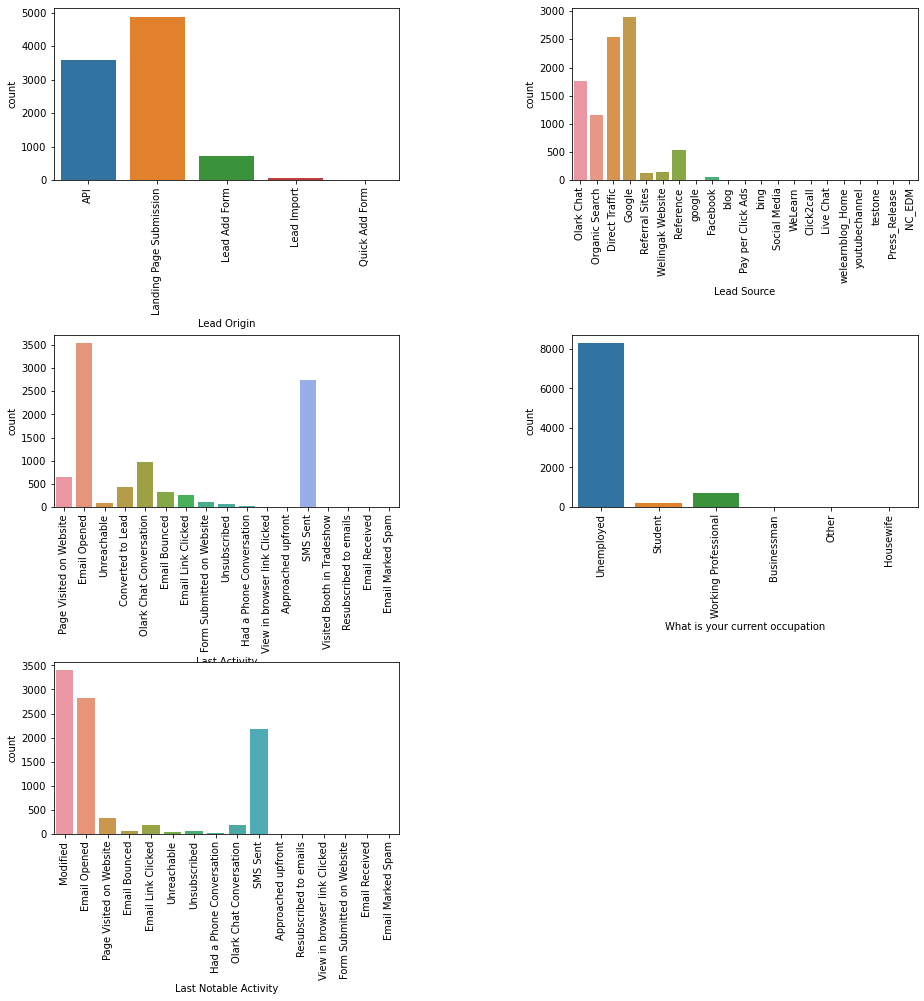

In [25]:
#using countplot to see the distribution of categorical plots 
cols=['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
k=1
plt.figure(figsize=(15, 20))
for i in cols:
    plt.subplot(4,2,k)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.9)
    sns.countplot(lead_1[i])
    plt.xticks(rotation=90)
    k=k+1
plt.show()

unemployed prefered to chose the comany more

leaad spurce is from google followed by direct traffic

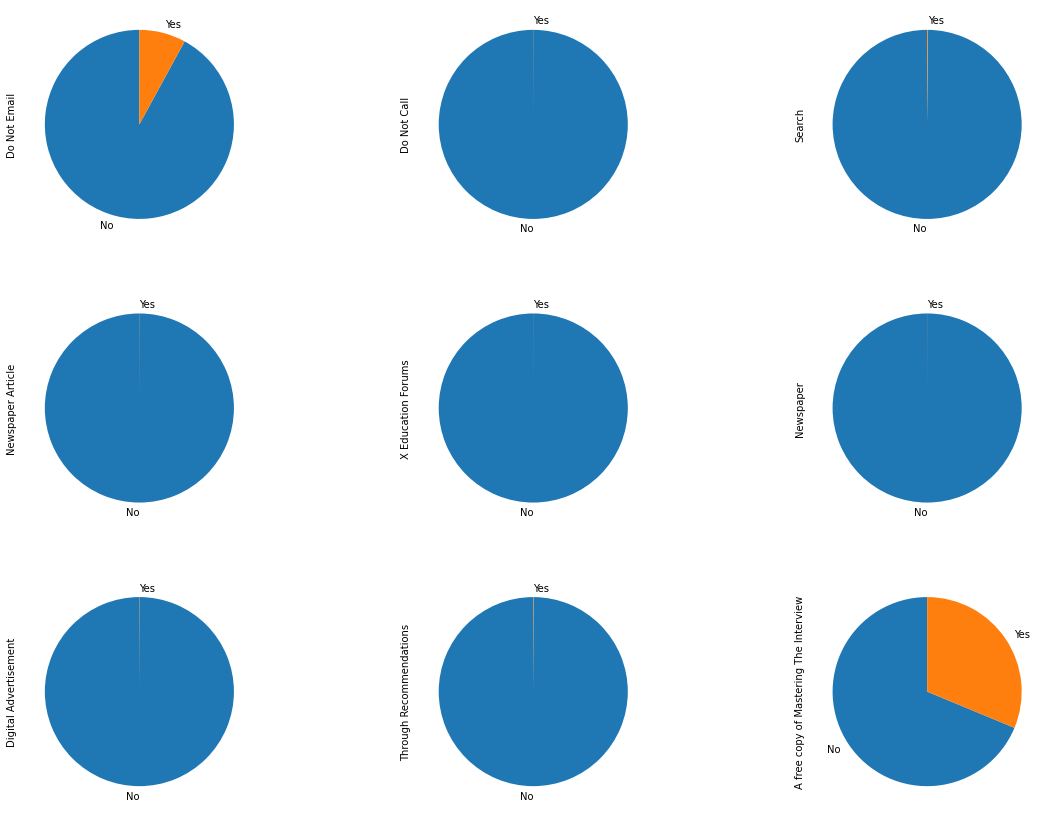

In [26]:
#using pie plt to see the distribution of numerical categorical data 
cols=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'A free copy of Mastering The Interview']
k=1
plt.figure(figsize=(20, 20))
for i in cols:
        plt.subplot(4,3,k)
        lead_1[i].value_counts(normalize=True).plot.pie(startangle=90)
        
        k=k+1
plt.show()

we observe that there is no affect of few variables so we can drop them

In [27]:
lead_1=lead_1.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
],1)

In [28]:
#let's check the shape of the dataset
lead_1.shape

(9240, 13)

In [29]:
### segmented univariate analysis

df=lead_1[lead_1["Converted"]==0.0]
df1=lead_1[lead_1["Converted"]==1.0]

Lead Origin


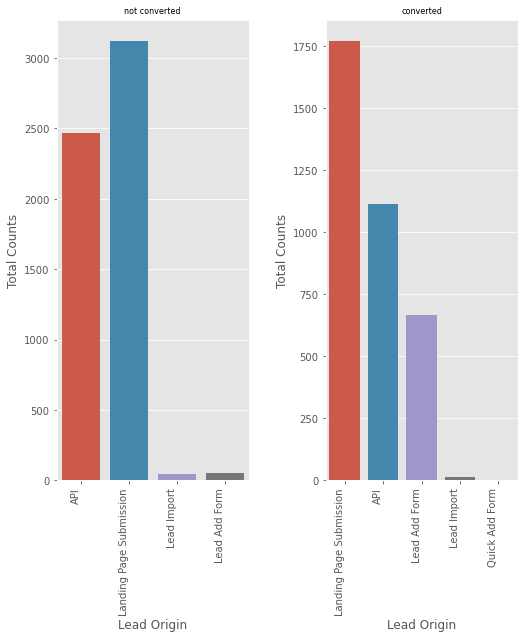

Lead Source


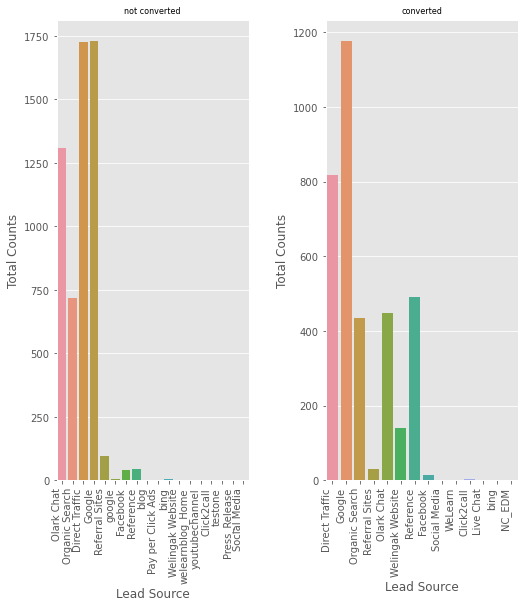

Do Not Email


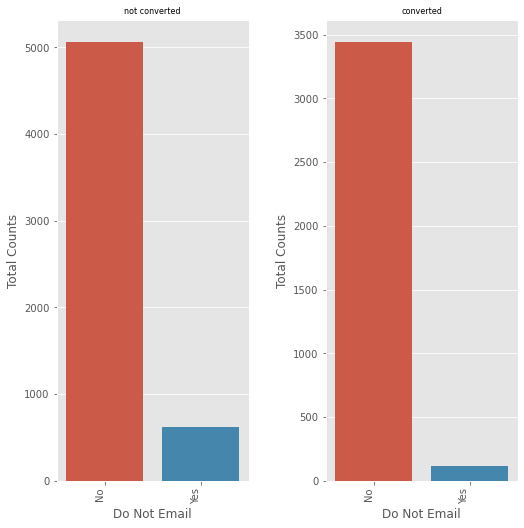

Last Activity


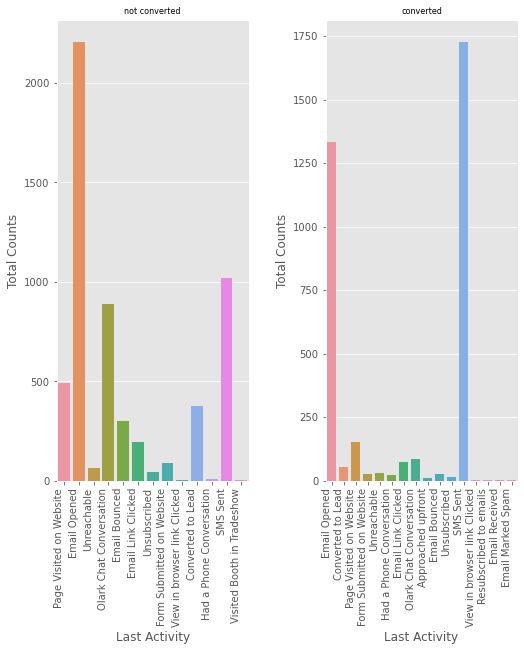

Country


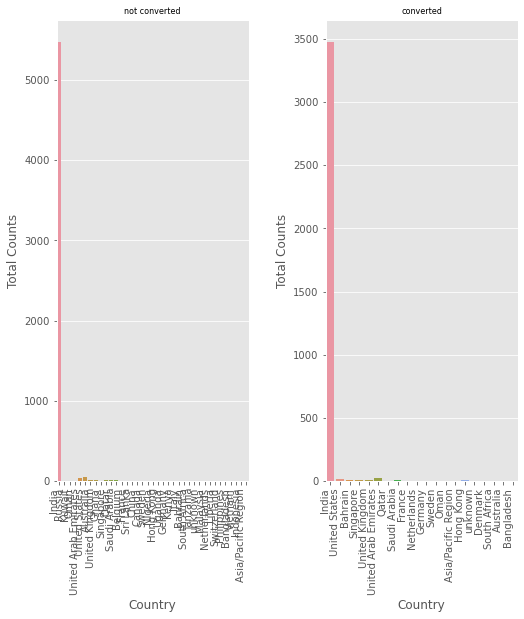

What is your current occupation


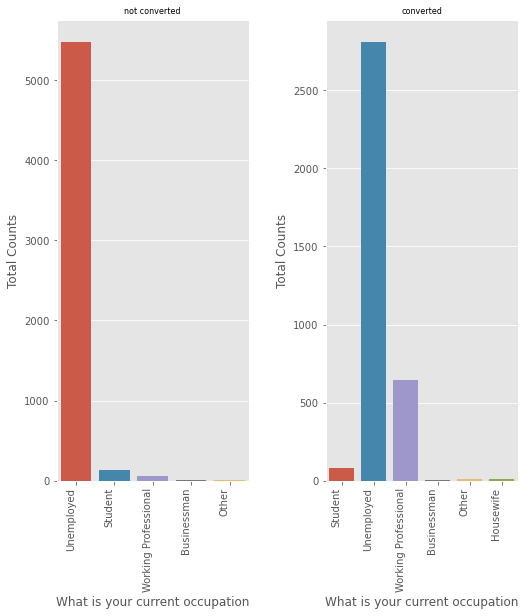

What matters most to you in choosing a course


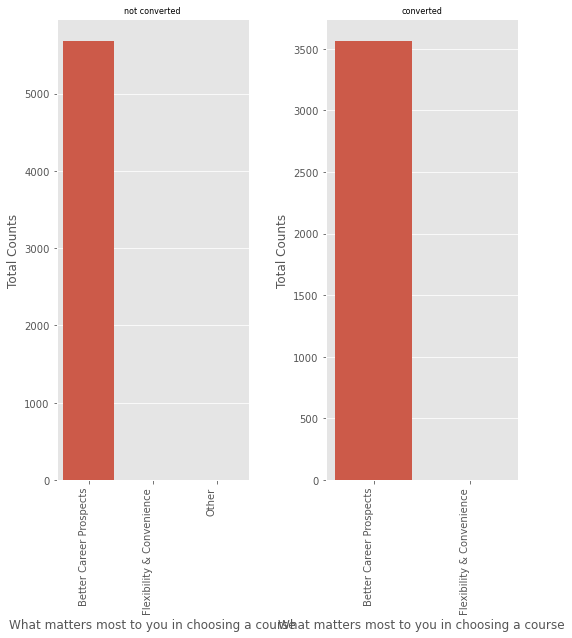

A free copy of Mastering The Interview


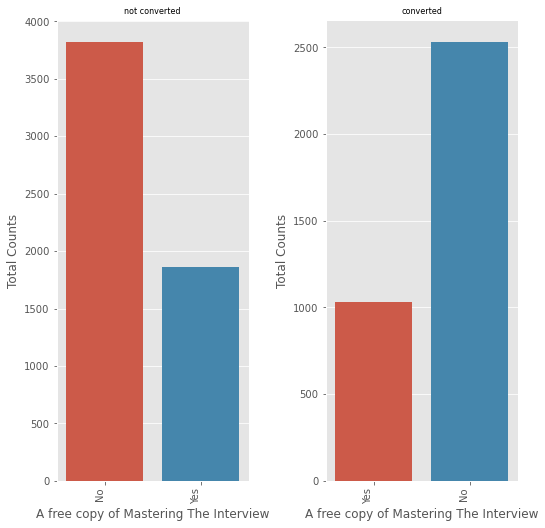

Last Notable Activity


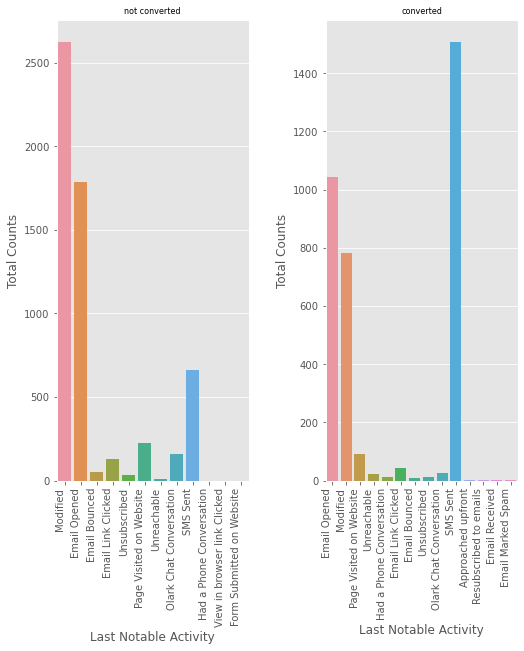

In [30]:
ccols=['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Country', 'What is your current occupation','What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for i in ccols:
    print(i)
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    sns.countplot(x=i, data=df,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title('not converted',fontsize=8)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
    
        
    sns.countplot(x=i, data=df1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title('converted',fontsize=8)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    
    
    plt.show()

Unemployed are considered for conversion followed by working professinal

People visited site from google are considered for conversion 

who received an sms are also considered

most of them are from mumbai that are converted


In [31]:
#since few variables has not much significance we can drop them
lead_1=lead_1.drop(['Country','What matters most to you in choosing a course'],1)

TotalVisits


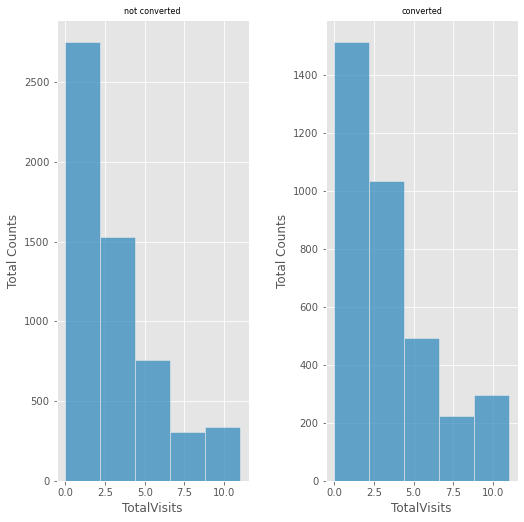

Total Time Spent on Website


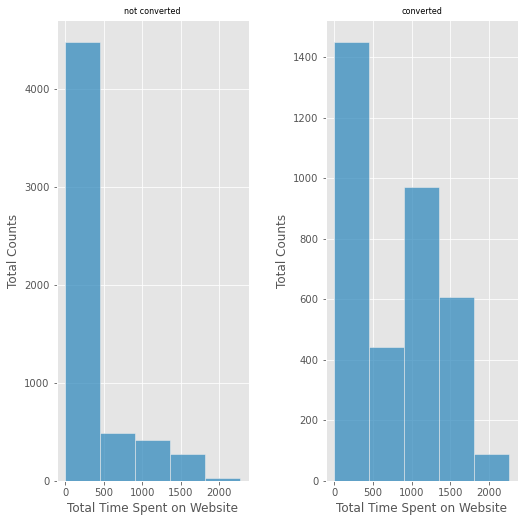

Page Views Per Visit


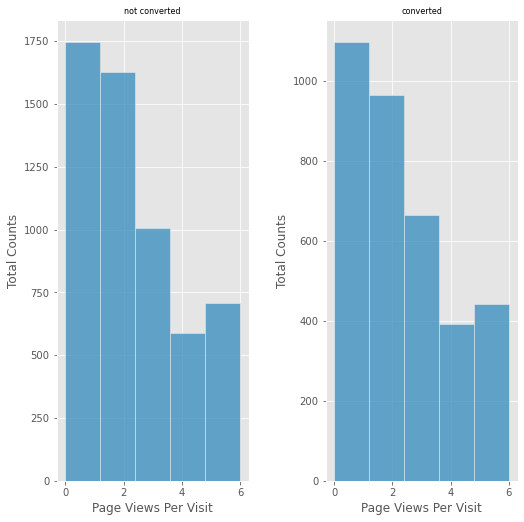

In [32]:
#histplot
ccols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in ccols:
    print(i)
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    sns.histplot(x=i, data=df,bins=5,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title('not converted',fontsize=8)
        
    sns.histplot(x=i, data=df1,bins=5,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title('converted',fontsize=8)    
    plt.show()

the one with page views between 0-2 are considered for conversion

### Bivariate analysis

##### scatterplot

In [33]:
def scplt(var1,var2):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,7))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    ax1 = sns.scatterplot(x=df[var1],y=df[var2],ax=ax1)
    ax1.set_title('Not Converted',fontsize=10)
    ax1.set_xticklabels(ax1.get_xticks(), rotation=90)
    ax1.set_yticklabels(ax1.get_yticks(),rotation=45)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")

    ax2 = sns.scatterplot(x=df1[var1],y=df1[var2],ax=ax2)
    ax2.set_title('converted',fontsize=10)
    ax2.set_xticklabels(ax2.get_xticks(), rotation=90)
    ax2.set_yticklabels(ax2.get_yticks(),rotation=45)
    ax2.set_xticklabels(ax2.get_yticklabels(), rotation=30, ha="right")

    plt.show()

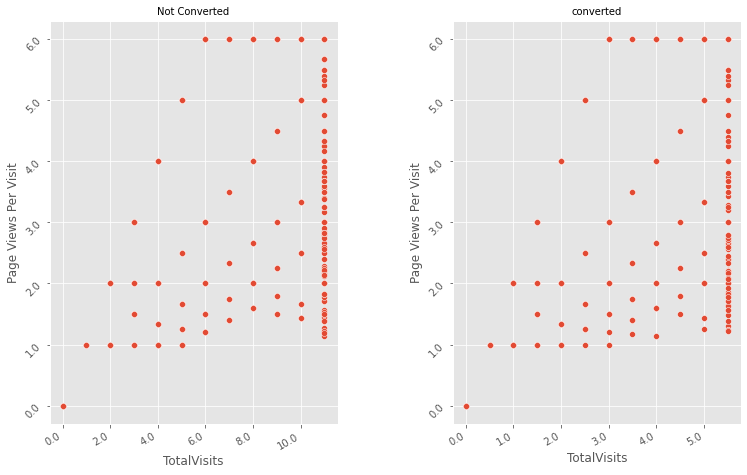

In [34]:
scplt("TotalVisits",'Page Views Per Visit')

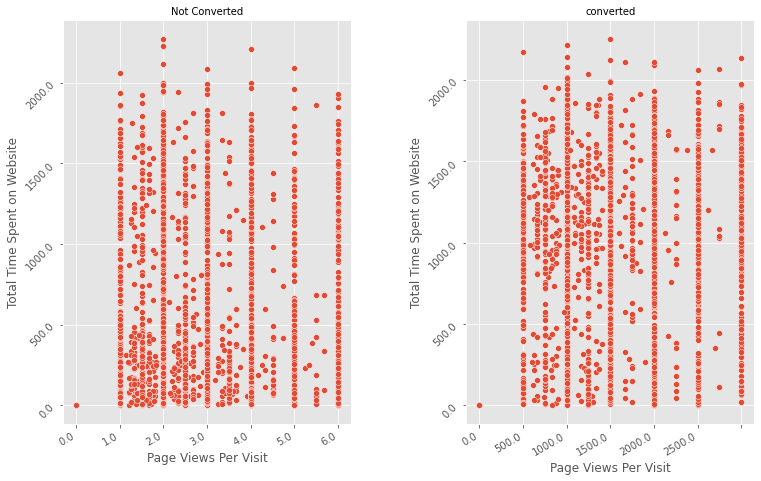

In [35]:
scplt('Page Views Per Visit','Total Time Spent on Website')

##### Countplot

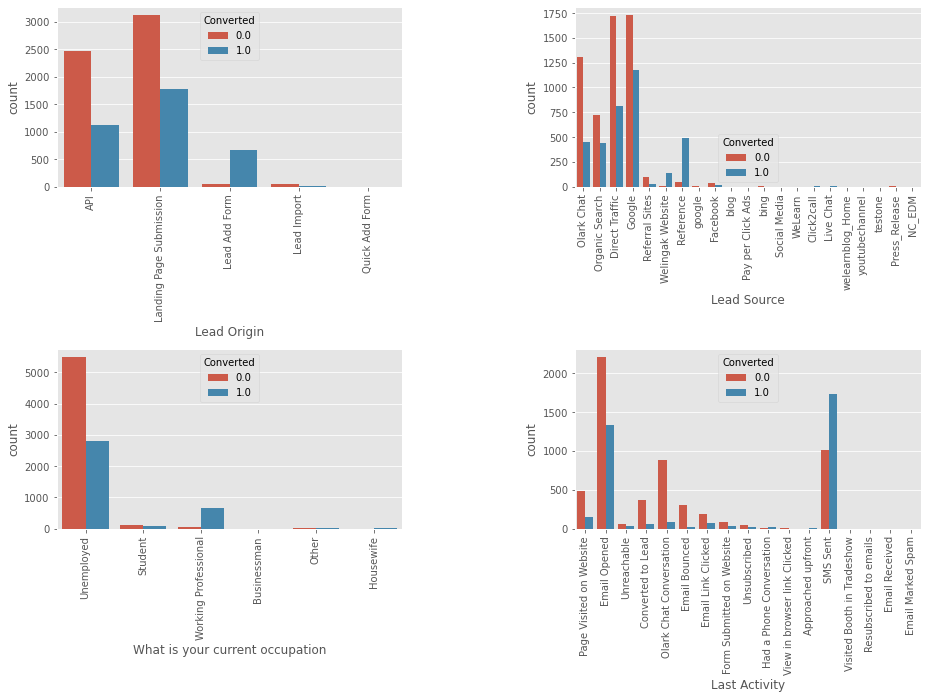

In [36]:
#using countplot to plot how categorical data is related to cnt
cols=["Lead Origin",'Lead Source','What is your current occupation','Last Activity']
k=1
plt.figure(figsize=(15, 15))
for i in cols:
        plt.subplot(3,2,k)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.9)
        sns.countplot(x=i,hue="Converted",data=lead_1)
        k=k+1
        plt.xticks(rotation=90)
plt.show()

landed on page submission are converted 

people from lead source as google are considered for conversion

unemployed are considered for conversion

#### Multivaraite Analysis

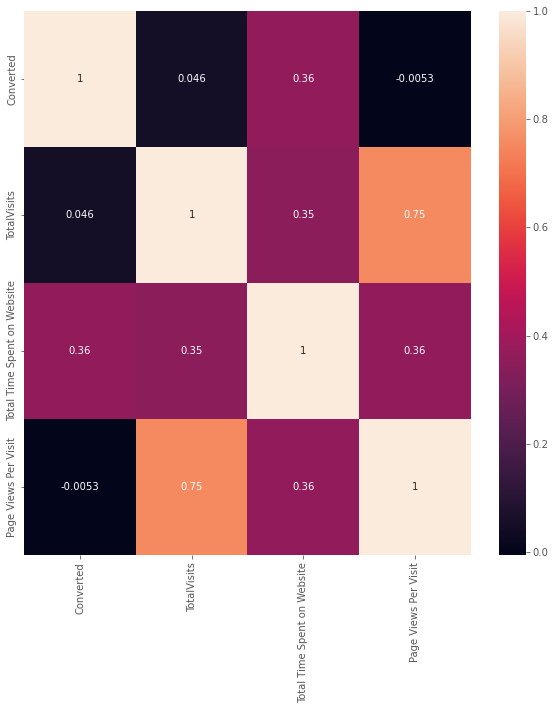

In [37]:
#plotting a heatmap
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(lead_1.corr(),annot = True)
plt.show()

we see page views per visit and total visits are correlated


### Step 5: Preparing the data for Modelling

#### Converting some binary variables (Yes/No) to 0/1

In [38]:
# List of variables to map
varlist =  ['Do Not Email','A free copy of Mastering The Interview']

In [39]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_1[varlist] = lead_1[varlist].apply(binary_map)

lead_1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0.0,5.0,674.0,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1.0,2.0,1532.0,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0.0,1.0,305.0,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1.0,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,Modified


In [40]:
#list all the coulmns of object datatype
columns=lead_1.columns
dum_cols=[]
for i in columns:
    if lead_1[i].dtype==object:
        dum_cols.append(i)
dum_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [41]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_1[dum_cols], drop_first=True)

# Adding the results to the master dataframe
lead_1= pd.concat([lead_1, dummy1], axis=1)

#### Dropping the repeated variables

In [42]:
# We have created dummies for the below variables, so we can drop them
lead_1= lead_1.drop(dum_cols, 1)


##### let's look at the heatmap

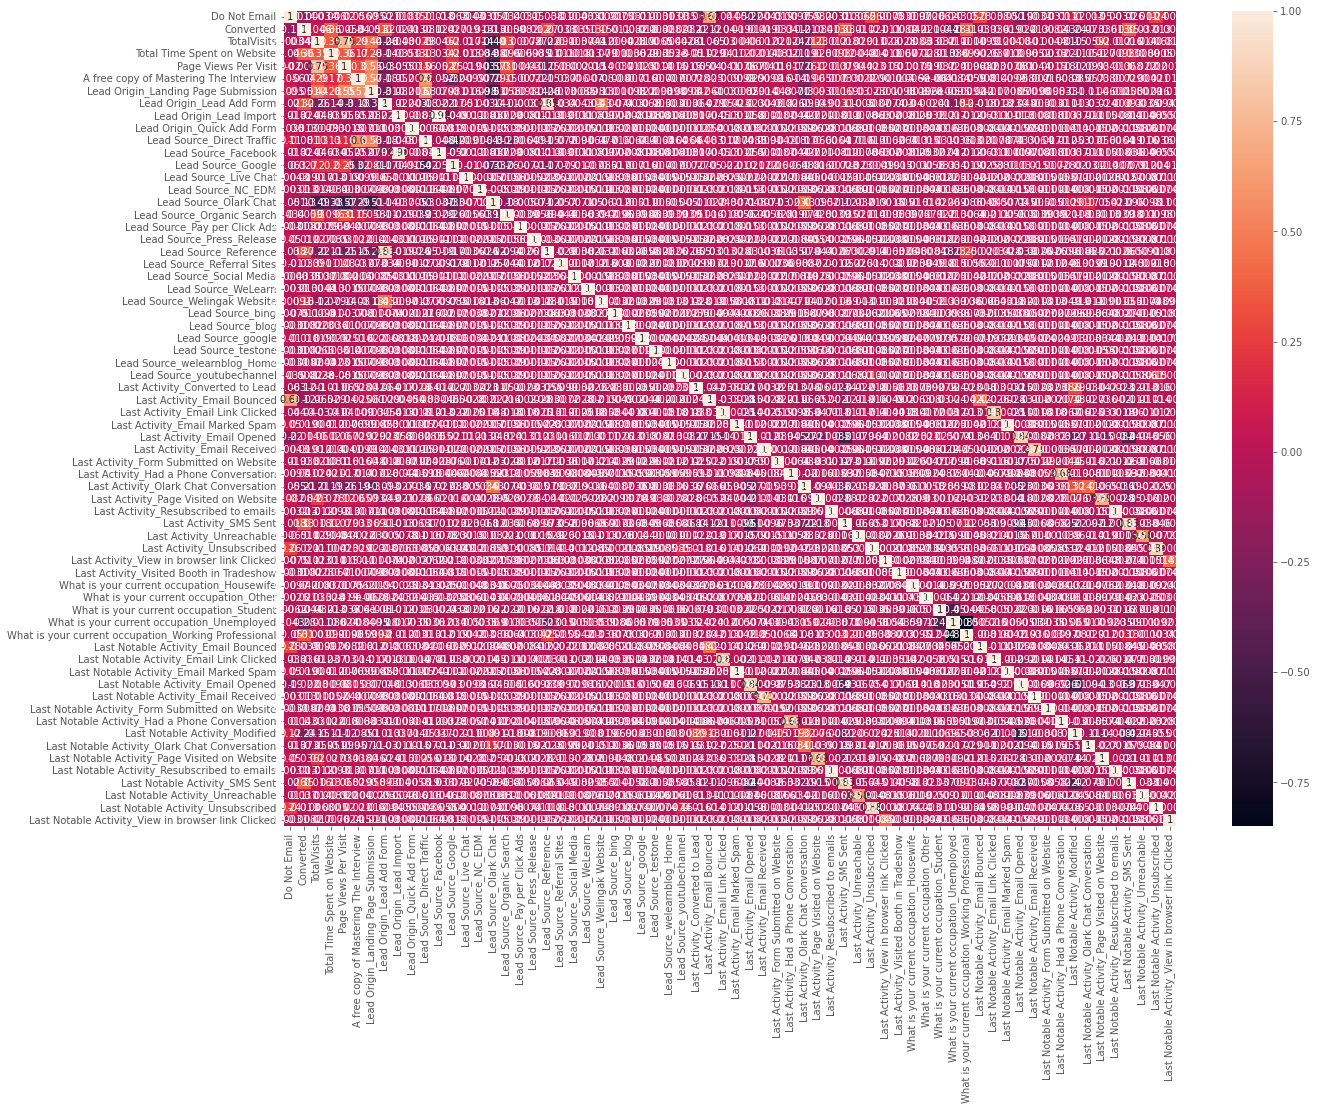

In [43]:
#plotting a heatmap
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(lead_1.corr(),annot = True)
plt.show()

In [44]:
# Create correlation matrix
corr_matrix = lead_1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['Lead Source_Facebook',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Resubscribed to emails']

In [45]:
#dropping dummies that are highly correlated
lead_1=lead_1.drop(to_drop,1)

In [46]:
lead_1.shape

(9240, 63)

In [47]:
lead_1['Converted']=lead_1['Converted'].astype(int)

### Step 6 : Model Building

Let's start by splitting our data into a training set and a test set.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Putting feature variable to X
X = lead_1.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532.0,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428.0,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# Putting response variable to y
y = lead_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [52]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [53]:
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.275215,0.005716,-0.516439,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.624595,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.624595,1.365219,1.553761,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,1.672735,0.964504,2.117849,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2376,0,-1.122305,-0.885371,-1.266675,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0.624595,-0.777416,1.553761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,-1.122305,-0.885371,-1.266675,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
### Checking the Convertion Rate
Converted = (sum(lead_1['Converted'])/len(lead_1['Converted'].index))*100
Converted

38.53896103896104

### Step 8: Feature Selection Using RFE

In [56]:
#importing logisticregression module
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
#feature selection using rfe
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Origin_Quick Add Form', False, 10),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 21),
 ('Lead Source_google', False, 

In [59]:
col_to_keep = X_train.columns[rfe.support_]
col_to_keep

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Ac

## Step 9:Modelling

In [61]:
#importing statsmodel api
import statsmodels.api as sm

In [62]:
X_train=X_train[col_to_keep]
X_test=X_test[col_to_keep]

In [63]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [64]:
model1=sm.GLM(y_train,X_train,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.5
Date:                Tue, 03 Jan 2023   Deviance:                       5369.1
Time:                        09:45:29   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2161      0.189     -6.429      0.000      -1.587      -0.845
Total Time Spent on Website                              1.1041      0.039     28.357      0.000       1.028       1.180
Lead Origin_Lead Add Form                                3.2394      0.486      6.661      0.000       2.286       4.193
Lead Source_Olark Chat                                   1.1725      0.098     11.941      0.000       0.980       1.365
Lead Source_Reference                                    0.5784      0.521      1.111      0.267      -0.442       1.599
Lead Source_Social Media                                 2.0934      1.423      1.471      0.141      -0.695       4.882
Lead Source_Welingak Website                             2.4869      0.867      2.868      0.004       0.787       4.187
Last Activity_Converted to Lead                         -1.0322      0.227     -4.550      0.000      -1.477      -0.588
Last Activity_Email Bounced                             -1.1400      0.344     -3.311      0.001      -1.815      -0.465
Last Activity_Had a Phone Conversation                   0.5972      0.953      0.627      0.531      -1.270       2.464
Last Activity_Olark Chat Conversation                   -1.2413      0.194     -6.399      0.000      -1.622      -0.861
What is your current occupation_Housewife               22.9268   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.8054      0.187     14.987      0.000       2.438       3.172
Last Notable Activity_Email Link Clicked                -1.8318      0.267     -6.859      0.000      -2.355      -1.308
Last Notable Activity_Email Opened                      -1.2440      0.062    -19.959      0.000      -1.366      -1.122
Last Notable Activity_Had a Phone Conversation           1.6234      1.453      1.117      0.264      -1.225       4.472
Last Notable Activity_Modified                          -1.6124      0.081    -19.885      0.000      -1.771      -1.453
Last Notable Activity_Olark Chat Conversation           -1.3530      0.370     -3.653      0.000      -2.079      -0.627
Last Notable Activity_Page Visited on Website           -1.5124      0.182     -8.289      0.000      -1.870      -1.155
Last Notable Activity_Unreachable                        0.3948      0.512      0.771      0.441      -0.609       1.398
========================================================================================================================
"""

In [65]:
#dropping variables with high p values
X_train_sm.drop(["What is your current occupation_Housewife",],axis=1,inplace=True)
X_test_sm.drop(["What is your current occupation_Housewife"],axis=1,inplace=True)

In [66]:
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.0
Date:                Tue, 03 Jan 2023   Deviance:                       5381.9
Time:                        09:45:29   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0802      0.069      1.170      0.242      -0.054       0.215
Do Not Email                                            -1.2650      0.193     -6.540      0.000      -1.644      -0.886
Total Time Spent on Website                              1.0958      0.039     27.797      0.000       1.019       1.173
Lead Origin_Lead Add Form                                3.2028      0.489      6.549      0.000       2.244       4.161
Lead Source_Olark Chat                                   1.1327      0.102     11.081      0.000       0.932       1.333
Lead Source_Reference                                    0.6084      0.522      1.165      0.244      -0.416       1.632
Lead Source_Social Media                                 2.0701      1.423      1.455      0.146      -0.718       4.858
Lead Source_Welingak Website                             2.4882      0.869      2.864      0.004       0.786       4.191
Last Activity_Converted to Lead                         -1.0473      0.226     -4.626      0.000      -1.491      -0.604
Last Activity_Email Bounced                             -1.1251      0.344     -3.266      0.001      -1.800      -0.450
Last Activity_Had a Phone Conversation                   0.5863      0.952      0.616      0.538      -1.280       2.452
Last Activity_Olark Chat Conversation                   -1.2385      0.194     -6.385      0.000      -1.619      -0.858
What is your current occupation_Working Professional     2.7821      0.188     14.794      0.000       2.413       3.151
Last Notable Activity_Email Link Clicked                -1.8786      0.270     -6.951      0.000      -2.408      -1.349
Last Notable Activity_Email Opened                      -1.3077      0.087    -15.039      0.000      -1.478      -1.137
Last Notable Activity_Had a Phone Conversation           1.5505      1.454      1.066      0.286      -1.300       4.401
Last Notable Activity_Modified                          -1.6696      0.099    -16.802      0.000      -1.864      -1.475
Last Notable Activity_Olark Chat Conversation           -1.4071      0.374     -3.762      0.000      -2.140      -0.674
Last Notable Activity_Page Visited on Website           -1.5797      0.191     -8.251      0.000      -1.955      -1.204
Last Notable Activity_Unreachable                        0.3187      0.516      0.618      0.537      -0.692       1.330
========================================================================================================================
"""

### Check VIF

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,5.049376
1,Do Not Email,1.741562
2,Total Time Spent on Website,1.257904
3,Lead Origin_Lead Add Form,14.568627
4,Lead Source_Olark Chat,1.443171
5,Lead Source_Reference,12.190576
6,Lead Source_Social Media,1.001487
7,Lead Source_Welingak Website,3.715387
8,Last Activity_Converted to Lead,1.191092
9,Last Activity_Email Bounced,1.736239


In [68]:
#dropping variables with high p values
X_train_sm.drop(["Last Notable Activity_Unreachable",],axis=1,inplace=True)
X_test_sm.drop(["Last Notable Activity_Unreachable"],axis=1,inplace=True)

In [69]:
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.1
Date:                Tue, 03 Jan 2023   Deviance:                       5382.3
Time:                        09:45:30   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0856      0.068      1.259      0.208      -0.048       0.219
Do Not Email                                            -1.2670      0.193     -6.549      0.000      -1.646      -0.888
Total Time Spent on Website                              1.0951      0.039     27.797      0.000       1.018       1.172
Lead Origin_Lead Add Form                                3.2003      0.489      6.542      0.000       2.241       4.159
Lead Source_Olark Chat                                   1.1313      0.102     11.072      0.000       0.931       1.332
Lead Source_Reference                                    0.6097      0.523      1.167      0.243      -0.415       1.634
Lead Source_Social Media                                 2.0694      1.423      1.455      0.146      -0.719       4.858
Lead Source_Welingak Website                             2.4887      0.869      2.865      0.004       0.786       4.191
Last Activity_Converted to Lead                         -1.0475      0.226     -4.628      0.000      -1.491      -0.604
Last Activity_Email Bounced                             -1.1248      0.344     -3.266      0.001      -1.800      -0.450
Last Activity_Had a Phone Conversation                   0.5865      0.952      0.616      0.538      -1.279       2.453
Last Activity_Olark Chat Conversation                   -1.2385      0.194     -6.385      0.000      -1.619      -0.858
What is your current occupation_Working Professional     2.7817      0.188     14.792      0.000       2.413       3.150
Last Notable Activity_Email Link Clicked                -1.8835      0.270     -6.972      0.000      -2.413      -1.354
Last Notable Activity_Email Opened                      -1.3126      0.087    -15.158      0.000      -1.482      -1.143
Last Notable Activity_Had a Phone Conversation           1.5446      1.454      1.062      0.288      -1.306       4.395
Last Notable Activity_Modified                          -1.6743      0.099    -16.897      0.000      -1.869      -1.480
Last Notable Activity_Olark Chat Conversation           -1.4115      0.374     -3.775      0.000      -2.144      -0.679
Last Notable Activity_Page Visited on Website           -1.5844      0.191     -8.283      0.000      -1.959      -1.210
========================================================================================================================
"""

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,4.983167
1,Do Not Email,1.741365
2,Total Time Spent on Website,1.257266
3,Lead Origin_Lead Add Form,14.566893
4,Lead Source_Olark Chat,1.442899
5,Lead Source_Reference,12.190094
6,Lead Source_Social Media,1.001487
7,Lead Source_Welingak Website,3.715384
8,Last Activity_Converted to Lead,1.191060
9,Last Activity_Email Bounced,1.736238


In [71]:
#dropping variables with high p values
X_train_sm.drop(["Last Activity_Had a Phone Conversation"],axis=1,inplace=True)


In [72]:
X_test_sm.drop(["Last Activity_Had a Phone Conversation"],axis=1,inplace=True)

In [73]:
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.3
Date:                Tue, 03 Jan 2023   Deviance:                       5382.7
Time:                        09:45:31   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0856      0.068      1.259      0.208      -0.048       0.219
Do Not Email                                            -1.2673      0.194     -6.549      0.000      -1.647      -0.888
Total Time Spent on Website                              1.0956      0.039     27.812      0.000       1.018       1.173
Lead Origin_Lead Add Form                                3.1997      0.489      6.541      0.000       2.241       4.158
Lead Source_Olark Chat                                   1.1312      0.102     11.070      0.000       0.931       1.331
Lead Source_Reference                                    0.6128      0.523      1.173      0.241      -0.411       1.637
Lead Source_Social Media                                 2.0675      1.422      1.454      0.146      -0.720       4.855
Lead Source_Welingak Website                             2.4884      0.869      2.864      0.004       0.786       4.191
Last Activity_Converted to Lead                         -1.0516      0.226     -4.647      0.000      -1.495      -0.608
Last Activity_Email Bounced                             -1.1273      0.344     -3.272      0.001      -1.802      -0.452
Last Activity_Olark Chat Conversation                   -1.2418      0.194     -6.405      0.000      -1.622      -0.862
What is your current occupation_Working Professional     2.7843      0.188     14.813      0.000       2.416       3.153
Last Notable Activity_Email Link Clicked                -1.8837      0.270     -6.972      0.000      -2.413      -1.354
Last Notable Activity_Email Opened                      -1.3128      0.087    -15.158      0.000      -1.483      -1.143
Last Notable Activity_Had a Phone Conversation           2.1314      1.099      1.939      0.052      -0.023       4.286
Last Notable Activity_Modified                          -1.6708      0.099    -16.893      0.000      -1.865      -1.477
Last Notable Activity_Olark Chat Conversation           -1.4081      0.374     -3.766      0.000      -2.141      -0.675
Last Notable Activity_Page Visited on Website           -1.5847      0.191     -8.284      0.000      -1.960      -1.210
========================================================================================================================
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,4.981459
1,Do Not Email,1.741216
2,Total Time Spent on Website,1.257048
3,Lead Origin_Lead Add Form,14.566884
4,Lead Source_Olark Chat,1.442885
5,Lead Source_Reference,12.188538
6,Lead Source_Social Media,1.001484
7,Lead Source_Welingak Website,3.715382
8,Last Activity_Converted to Lead,1.189773
9,Last Activity_Email Bounced,1.735141


In [75]:
#dropping variables with high p values
X_train_sm.drop(["Lead Source_Reference"],axis=1,inplace=True)
X_test_sm.drop(["Lead Source_Reference"],axis=1,inplace=True)

In [76]:
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.0
Date:                Tue, 03 Jan 2023   Deviance:                       5384.0
Time:                        09:45:31   Pearson chi2:                 7.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0850      0.068      1.249      0.211      -0.048       0.218
Do Not Email                                            -1.2813      0.194     -6.600      0.000      -1.662      -0.901
Total Time Spent on Website                              1.0952      0.039     27.808      0.000       1.018       1.172
Lead Origin_Lead Add Form                                3.7387      0.190     19.651      0.000       3.366       4.112
Lead Source_Olark Chat                                   1.1299      0.102     11.058      0.000       0.930       1.330
Lead Source_Social Media                                 2.0660      1.422      1.452      0.146      -0.722       4.854
Lead Source_Welingak Website                             1.9509      0.743      2.624      0.009       0.494       3.408
Last Activity_Converted to Lead                         -1.0536      0.226     -4.656      0.000      -1.497      -0.610
Last Activity_Email Bounced                             -1.1452      0.346     -3.310      0.001      -1.823      -0.467
Last Activity_Olark Chat Conversation                   -1.2423      0.194     -6.409      0.000      -1.622      -0.862
What is your current occupation_Working Professional     2.7871      0.188     14.834      0.000       2.419       3.155
Last Notable Activity_Email Link Clicked                -1.8766      0.269     -6.965      0.000      -2.405      -1.349
Last Notable Activity_Email Opened                      -1.3105      0.087    -15.138      0.000      -1.480      -1.141
Last Notable Activity_Had a Phone Conversation           2.1318      1.099      1.939      0.052      -0.023       4.286
Last Notable Activity_Modified                          -1.6683      0.099    -16.869      0.000      -1.862      -1.474
Last Notable Activity_Olark Chat Conversation           -1.4052      0.374     -3.760      0.000      -2.138      -0.673
Last Notable Activity_Page Visited on Website           -1.5831      0.191     -8.273      0.000      -1.958      -1.208
========================================================================================================================
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,4.976893
1,Do Not Email,1.738161
2,Total Time Spent on Website,1.257034
3,Lead Origin_Lead Add Form,1.361939
4,Lead Source_Olark Chat,1.442603
5,Lead Source_Social Media,1.001484
6,Lead Source_Welingak Website,1.219639
7,Last Activity_Converted to Lead,1.189586
8,Last Activity_Email Bounced,1.735114
9,Last Activity_Olark Chat Conversation,1.786276


In [78]:
#dropping variables with high p values
X_train_sm.drop(["Lead Source_Social Media",],axis=1,inplace=True)
X_test_sm.drop(["Lead Source_Social Media"],axis=1,inplace=True)

In [79]:
model6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.9
Date:                Tue, 03 Jan 2023   Deviance:                       5385.8
Time:                        09:45:31   Pearson chi2:                 7.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0857      0.068      1.260      0.208      -0.048       0.219
Do Not Email                                            -1.2820      0.194     -6.605      0.000      -1.662      -0.902
Total Time Spent on Website                              1.0948      0.039     27.802      0.000       1.018       1.172
Lead Origin_Lead Add Form                                3.7368      0.190     19.643      0.000       3.364       4.110
Lead Source_Olark Chat                                   1.1266      0.102     11.031      0.000       0.926       1.327
Lead Source_Welingak Website                             1.9510      0.743      2.624      0.009       0.494       3.408
Last Activity_Converted to Lead                         -1.0560      0.226     -4.667      0.000      -1.499      -0.613
Last Activity_Email Bounced                             -1.1455      0.346     -3.311      0.001      -1.824      -0.467
Last Activity_Olark Chat Conversation                   -1.2309      0.193     -6.368      0.000      -1.610      -0.852
What is your current occupation_Working Professional     2.7858      0.188     14.830      0.000       2.418       3.154
Last Notable Activity_Email Link Clicked                -1.8760      0.269     -6.963      0.000      -2.404      -1.348
Last Notable Activity_Email Opened                      -1.3105      0.087    -15.138      0.000      -1.480      -1.141
Last Notable Activity_Had a Phone Conversation           2.1309      1.099      1.939      0.053      -0.023       4.285
Last Notable Activity_Modified                          -1.6662      0.099    -16.851      0.000      -1.860      -1.472
Last Notable Activity_Olark Chat Conversation           -1.4150      0.373     -3.789      0.000      -2.147      -0.683
Last Notable Activity_Page Visited on Website           -1.5832      0.191     -8.274      0.000      -1.958      -1.208
========================================================================================================================
"""

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,4.976665
1,Do Not Email,1.738106
2,Total Time Spent on Website,1.257034
3,Lead Origin_Lead Add Form,1.361897
4,Lead Source_Olark Chat,1.442010
5,Lead Source_Welingak Website,1.219639
6,Last Activity_Converted to Lead,1.189456
7,Last Activity_Email Bounced,1.735110
8,Last Activity_Olark Chat Conversation,1.785461
9,What is your current occupation_Working Profes...,1.091146


In [81]:
#dropping variables with high p values
X_train_sm.drop(["const"],axis=1,inplace=True)
X_test_sm.drop(["const"],axis=1,inplace=True)

In [82]:
model7=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.7
Date:                Tue, 03 Jan 2023   Deviance:                       5387.4
Time:                        09:45:32   Pearson chi2:                 7.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2316      0.190     -6.490      0.000      -1.604      -0.860
Total Time Spent on Website                              1.1026      0.039     28.373      0.000       1.026       1.179
Lead Origin_Lead Add Form                                3.7638      0.189     19.945      0.000       3.394       4.134
Lead Source_Olark Chat                                   1.1626      0.098     11.865      0.000       0.971       1.355
Lead Source_Welingak Website                             1.9537      0.743      2.630      0.009       0.497       3.410
Last Activity_Converted to Lead                         -1.0497      0.227     -4.632      0.000      -1.494      -0.605
Last Activity_Email Bounced                             -1.1653      0.346     -3.369      0.001      -1.843      -0.487
Last Activity_Olark Chat Conversation                   -1.2408      0.193     -6.422      0.000      -1.620      -0.862
What is your current occupation_Working Professional     2.8050      0.187     15.005      0.000       2.439       3.171
Last Notable Activity_Email Link Clicked                -1.8055      0.264     -6.845      0.000      -2.323      -1.289
Last Notable Activity_Email Opened                      -1.2345      0.062    -19.875      0.000      -1.356      -1.113
Last Notable Activity_Had a Phone Conversation           2.2199      1.097      2.023      0.043       0.069       4.370
Last Notable Activity_Modified                          -1.5939      0.081    -19.799      0.000      -1.752      -1.436
Last Notable Activity_Olark Chat Conversation           -1.3459      0.370     -3.639      0.000      -2.071      -0.621
Last Notable Activity_Page Visited on Website           -1.5098      0.182     -8.275      0.000      -1.867      -1.152
========================================================================================================================
"""

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,Do Not Email,1.806070
1,Total Time Spent on Website,1.203181
2,Lead Origin_Lead Add Form,1.420101
3,Lead Source_Olark Chat,1.668478
4,Lead Source_Welingak Website,1.234910
5,Last Activity_Converted to Lead,1.240665
6,Last Activity_Email Bounced,1.794549
7,Last Activity_Olark Chat Conversation,1.988498
8,What is your current occupation_Working Profes...,1.136381
9,Last Notable Activity_Email Link Clicked,1.018204


the vif values are in the required range, so we can evaluate the model

## step 10:Evaluation

In [84]:
# Getting the predicted values on the train set
y_train_pred = result7.predict(X_train_sm)
y_train_pred[:10]

1871    0.259593
6795    0.226490
3516    0.302750
8105    0.818354
3934    0.196638
4844    0.992301
3297    0.115145
8071    0.990866
987     0.121791
7423    0.898168
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2595933 , 0.22648964, 0.30274955, 0.81835364, 0.19663816,
       0.99230097, 0.11514458, 0.99086632, 0.12179115, 0.89816756])

In [86]:
##### Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.259593,1871
1,0,0.226490,6795
2,0,0.302750,3516
3,0,0.818354,8105
4,0,0.196638,3934


In [87]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.259593,1871,0
1,0,0.226490,6795,0
2,0,0.302750,3516,0
3,0,0.818354,8105,1
4,0,0.196638,3934,0


In [88]:
#import metrics from sklearn
from sklearn import metrics

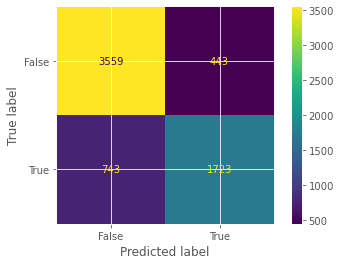

In [89]:
# Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8166357452071737

In [91]:
## Metrics beyond simply accuracy

TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6987023519870236

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8893053473263368

In [94]:
# Calculate false postive rate - predicting convetred when customer does not have converted
print(FP/ float(TN+FP))

0.11069465267366317


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.7954755309325946


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8272896327289633


### Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

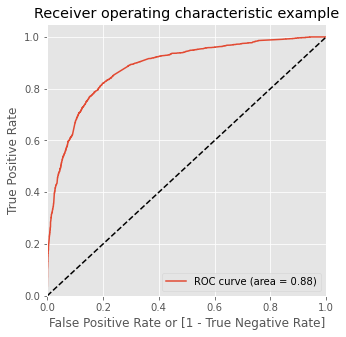

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.259593,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.226490,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302750,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.818354,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.196638,3934,0,1,1,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [101]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [102]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.584879  0.967964  0.348826
0.2   0.2  0.758349  0.904298  0.668416
0.3   0.3  0.803185  0.833333  0.784608
0.4   0.4  0.817718  0.764396  0.850575
0.5   0.5  0.816636  0.698702  0.889305
0.6   0.6  0.797928  0.590024  0.926037
0.7   0.7  0.782468  0.510949  0.949775
0.8   0.8  0.756494  0.406732  0.972014
0.9   0.9  0.713667  0.268045  0.988256


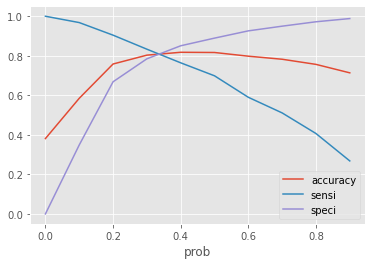

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.259593,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.226490,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.302750,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.818354,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.196638,3934,0,1,1,0,0,0,0,0,0,0,0,0


##### Assigning lead_score on train data

In [105]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.259593,1871,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.226490,6795,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.302750,3516,0,1,1,1,1,0,0,0,0,0,0,1,30
3,0,0.818354,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.196638,3934,0,1,1,0,0,0,0,0,0,0,0,0,20


In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031849103277675

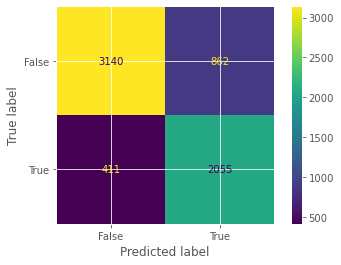

In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2,display_labels=["False","True"])
cm_display.plot()
plt.show()

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.784607696151924

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21539230384807595


In [112]:
# Positive predictive value 
print (TP / float(TP+FP))

0.704490915323963


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8842579555054914


### Precision and Recall

In [114]:
from sklearn.metrics import precision_score, recall_score

##### precision_score

In [115]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7954755309325946

##### recall score

In [116]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6987023519870236

#### Precision and recall tradeoff

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int32,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

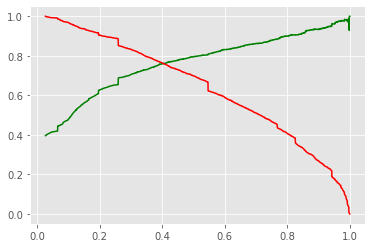

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 12: Making predictions on the test set

In [121]:
#Making predictions on the test set

y_test_pred = result7.predict(X_test_sm)

In [122]:
y_test_pred[:10]

4269    0.743344
2376    0.942003
7766    0.875209
9199    0.066097
4359    0.825356
9186    0.564262
1631    0.458325
8963    0.158417
8007    0.050894
5324    0.342226
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [124]:
# Let's see the head
y_pred_1.head()

,0
4269,0.743344
2376,0.942003
7766,0.875209
9199,0.066097
4359,0.825356


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting Lead NUmber to index
y_test_df['Lead Number'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.743344
1,1,2376,0.942003
2,1,7766,0.875209
3,0,9199,0.066097
4,1,4359,0.825356


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.743344
1,1,2376,0.942003
2,1,7766,0.875209
3,0,9199,0.066097
4,1,4359,0.825356


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [133]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.743344,1
1,1,2376,0.942003,1
2,1,7766,0.875209,1
3,0,9199,0.066097,0
4,1,4359,0.825356,1


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.814935064935065

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1450,  227],
       [ 286,  809]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7388127853881279

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.86463923673226

In [139]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13536076326774002


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7808880308880309


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8352534562211982


### Precision and Recall

In [142]:
from sklearn.metrics import precision_score, recall_score

##### precision_score

In [143]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7808880308880309

##### recall score

In [144]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7388127853881279

#### Precision and recall tradeoff

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_pred_final.Converted, y_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       0
 4       1
        ..
 2767    0
 2768    1
 2769    0
 2770    0
 2771    1
 Name: Converted, Length: 2772, dtype: int32,
 0       1
 1       1
 2       1
 3       0
 4       1
        ..
 2767    0
 2768    1
 2769    0
 2770    0
 2771    1
 Name: final_predicted, Length: 2772, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

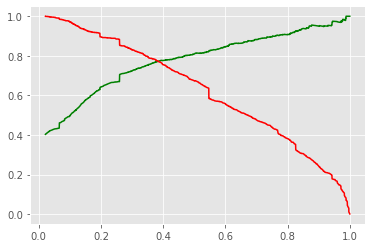

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Assiging lead score on test data

In [149]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
0,1,4269,0.743344,1,74
1,1,2376,0.942003,1,94
2,1,7766,0.875209,1,88
3,0,9199,0.066097,0,7
4,1,4359,0.825356,1,83


###### lead score to be contacted by the comapny

In [150]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
1,1,2376,0.942003,1,94
2,1,7766,0.875209,1,88
12,1,2935,0.912494,1,91
13,1,2907,0.908717,1,91
33,1,8429,0.991348,1,99
40,1,1200,0.938994,1,94
49,1,5638,0.963219,1,96
54,1,7631,0.872679,1,87
88,1,6666,0.989995,1,99
92,1,5448,0.897055,1,90


important features for our final model

In [151]:
result7.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.763782
What is your current occupation_Working Professional    2.804966
Last Notable Activity_Had a Phone Conversation          2.219890
Lead Source_Welingak Website                            1.953684
Lead Source_Olark Chat                                  1.162631
Total Time Spent on Website                             1.102558
Last Activity_Converted to Lead                        -1.049689
Last Activity_Email Bounced                            -1.165263
Do Not Email                                           -1.231627
Last Notable Activity_Email Opened                     -1.234543
Last Activity_Olark Chat Conversation                  -1.240816
Last Notable Activity_Olark Chat Conversation          -1.345858
Last Notable Activity_Page Visited on Website          -1.509752
Last Notable Activity_Modified                         -1.593899
Last Notable Activity_Email Link Clicked               -1.805528
dtype: float64

###### Accuracy,specificity,sensitivity of train data

accuracy=81.6%

sensitivity=69.9%

specificity=88.9%

###### Accuracy,specificity,sensitivity of test data

accuracy=81.7%

sensitivity=73.8%

specificity=86.4%

We have acheived the 80% accuracy required by the company